In [76]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [77]:
path = "../data/Test_knight.csv"
data_test = pd.read_csv(path)

columns = data_test.columns
N = len(columns)

In [78]:
path = "../data/Train_knight.csv"
data_train= pd.read_csv(path)

In [79]:
encoder = LabelEncoder()
labels = encoder.fit_transform(data_train['knight'])

# Sith = 1 and Jedi = 0
data_train['knight'] = labels

In [80]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(data_train)
train_scaled = pd.DataFrame(train_scaled, columns=data_train.columns)

new_knight = train_scaled['knight'].unique()
# train_scaled.head()


In [81]:
test_scaled = scaler.fit_transform(data_test)
test_scaled = pd.DataFrame(test_scaled, columns=data_test.columns)
# test_scaled.head()

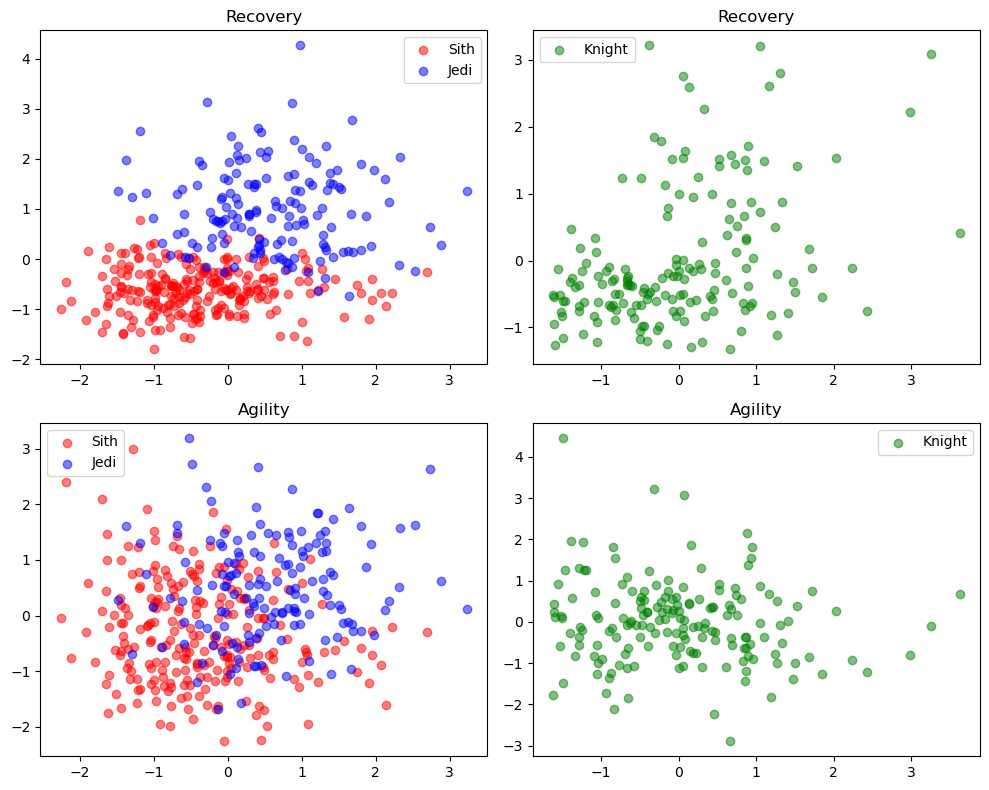

In [82]:
data_sith = train_scaled[train_scaled['knight'] == new_knight[0]]
data_jedi = train_scaled[train_scaled['knight'] == new_knight[1]]

col_test = 'Evade'

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].scatter(data_sith[col_test],data_sith['Recovery'], marker='o', alpha=0.5, c='r')
axs[0, 0].scatter(data_jedi[col_test],data_jedi['Recovery'], marker='o', alpha=0.5, c='b')
axs[0, 0].set_title('Recovery')
axs[0, 0].legend(['Sith', 'Jedi'])

axs[0, 1].scatter(test_scaled[col_test],test_scaled['Recovery'], marker='o', alpha=0.5, c='g')
axs[0, 1].set_title('Recovery')
axs[0, 1].legend(['Knight'])

axs[1, 0].scatter(data_sith[col_test],data_sith['Agility'], marker='o', alpha=0.5, c='r')
axs[1, 0].scatter(data_jedi[col_test],data_jedi['Agility'], marker='o', alpha=0.5, c='b')
axs[1, 0].set_title('Agility')
axs[1, 0].legend(['Sith', 'Jedi'])


axs[1, 1].scatter(test_scaled[col_test],test_scaled['Agility'], marker='o', alpha=0.5, c='g')
axs[1, 1].set_title('Agility')
axs[1, 1].legend(['Knight'])

plt.tight_layout()
plt.show()